# Build a SLR model for the price of a used car (KMs v. Price)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset used from:
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/usedcars.csv

In [4]:
df = pd.read_csv("usedcars.csv")

### Extract model info so as to only plot regression line on only one single model -> compare apples with apples

In [24]:
print pd.unique(df.model)

['SEL' 'SE' 'SES']


In [25]:
models = df[["model"]].groupby(["model"]).size().reset_index(name="counts")
models

,model,counts
0,SE,78
1,SEL,23
2,SES,49


In [26]:
df["price_thousands"] = df.price/1000
df["km_thousands"] = (df.mileage*1.609)/1000

# Find limits
min_mileage = min(df.km_thousands)
max_mileage = max(df.km_thousands)
min_price = min(df.price_thousands)
max_price = max(df.price_thousands)

print min_mileage, max_mileage
print min_price,max_price


7.831003 243.729711
3.8 21.992


### Generate best-fit line using SLR

In [27]:
def fitLine(data_x, data_y):
    sumX = np.sum(data_x)
    sumY = np.sum(data_y)
    sumXY = np.sum(np.multiply(data_x, data_y))
    sumX_2 = np.sum(np.multiply(data_x, data_x))
    
    n = len(data_x)
    
    m = (n*sumXY - sumX*sumY) / (n * sumX_2 - (sumX*sumX))
    
    b = (sumY * sumX_2 - sumXY*sumX) / (n*sumX_2 - (sumX*sumX))
    
    return (m,b)

In [28]:
# iterate over all the distinct models
fit_models = np.zeros([models.shape[0], 2])
print fit_models
for i in np.arange(models.shape[0]):
    print i
    model = models.iloc[i,0]
    mileage_prices = df[df.model==model][["km_thousands", "price_thousands"]]
    
    (fit_models[i,0],fit_models[i,1]) = fitLine(mileage_prices.iloc[:,0], mileage_prices.iloc[:,1])

    
print fit_models

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
0
1
2
[[ -0.04815593  15.80828055]
 [ -0.07758427  19.38474533]
 [ -0.06076001  17.49322714]]


In [29]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals

    plt.plot(x_vals, y_vals, '--')

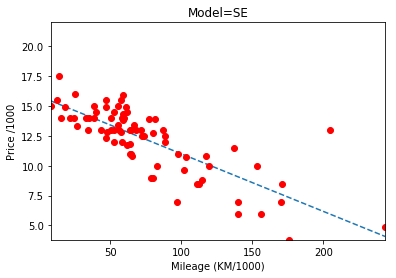

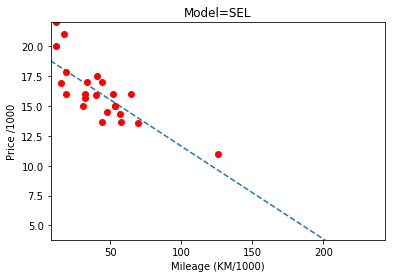

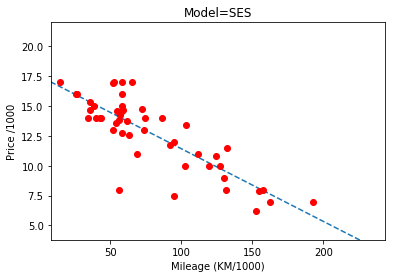

In [30]:
for i in np.arange(models.shape[0]):
    plt.figure()
    t = models.iloc[i, 0]

    plt.title("Model="+t)
    plt.xlabel("Mileage (KM/1000)")
    plt.ylabel("Price /1000")
    plt.axis([min_mileage, max_mileage, min_price, max_price])


    abline(fit_models[i,0], fit_models[i,1])

    plt.plot(df[df.model==models.iloc[i,0]].km_thousands, df[df.model==models.iloc[i,0]].price_thousands,"ro")


    plt.show()